# **Packages**

In [11]:
import numpy as np # NumPy
import pandas as pd # Pandas (data processing)
import seaborn as sns # Seaborn dataviz
import matplotlib.pyplot as plt # Matplotlib (data visualization)

In [12]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-salary-2021-to-2023/Data Science Salary 2021 to 2023.csv


# **Import data**

In [13]:
df = pd.read_csv('/kaggle/input/data-science-salary-2021-to-2023/Data Science Salary 2021 to 2023.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
...,...,...,...,...,...,...,...,...,...
3756,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,M
3757,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M
3759,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,S


    EN - "Entry" employees who are at the beginning of their careers

    MI - "Mid" or "Middle": employees who have gained some experience in their field but aren't yet considered experts or senior-level professionals. 

    SE - "Senior": employees have substantial experience and expertise in their field.

    EX - "Expert" or "Executive": expert-level professionals or "executive" such as CEOs, CFOs, etc.

# **Data description**

## Numeric data description

In [14]:
df.describe(include='int').T

,count,mean,std,min,25%,50%,75%,max
work_year,3761.0,2022.374103,0.691252,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3761.0,190599.886200,671145.715636,6000.0,100000.0,137500.0,180000.0,30400000.0
salary_in_usd,3761.0,137555.178942,63022.267974,5132.0,95000.0,135000.0,175000.0,450000.0


## Categorical data description

In [15]:
df.describe(include='object').T

,count,unique,top,freq
experience_level,3761,4,SE,2518
employment_type,3761,4,FT,3724
job_title,3761,93,Data Engineer,1040
salary_currency,3761,20,USD,3229
company_location,3761,72,US,3045
company_size,3761,3,M,3157


## Review of null cells

In [16]:
df.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

# **EDA**

## Job titles

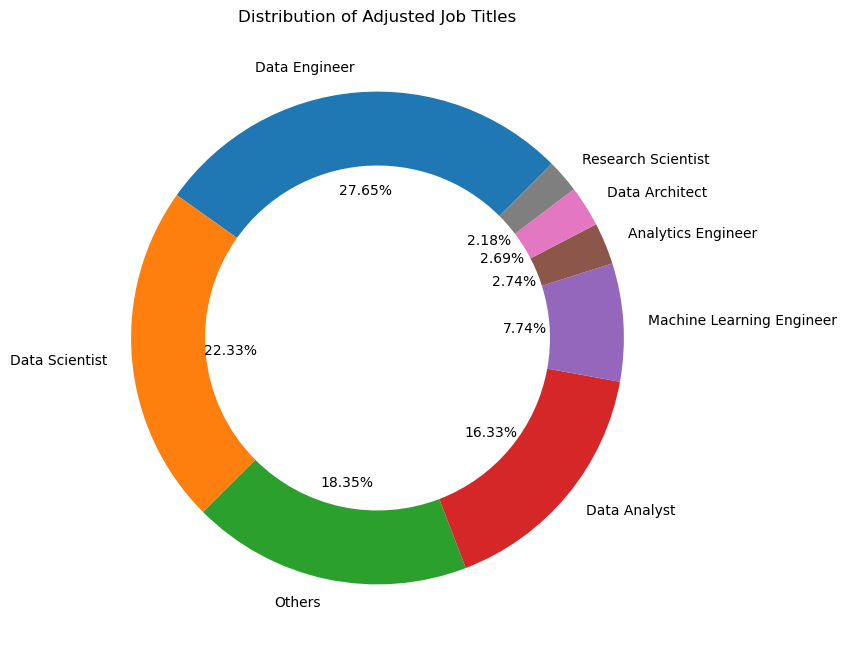

In [17]:
# Calculate frequency of each job title
job_title_counts = df['job_title'].value_counts()

# Determine titles below the threshold, e.g., less than 100 occurrences
low_frequency_titles = job_title_counts[job_title_counts < 75].index

# Replace these titles in the dataframe with "Others"
df['adjusted_job_title'] = df['job_title'].apply(lambda x: "Others" if x in low_frequency_titles else x)

# Recalculate the frequency
adjusted_counts = df['adjusted_job_title'].value_counts()

# Plot
plt.figure(figsize=(10,8))
adjusted_counts.plot.pie(autopct='%.2f%%', startangle=45, wedgeprops=dict(width=0.3))
plt.title('Distribution of Adjusted Job Titles')
plt.ylabel('')  # Hide the 'adjusted_job_title' y-label
plt.show()

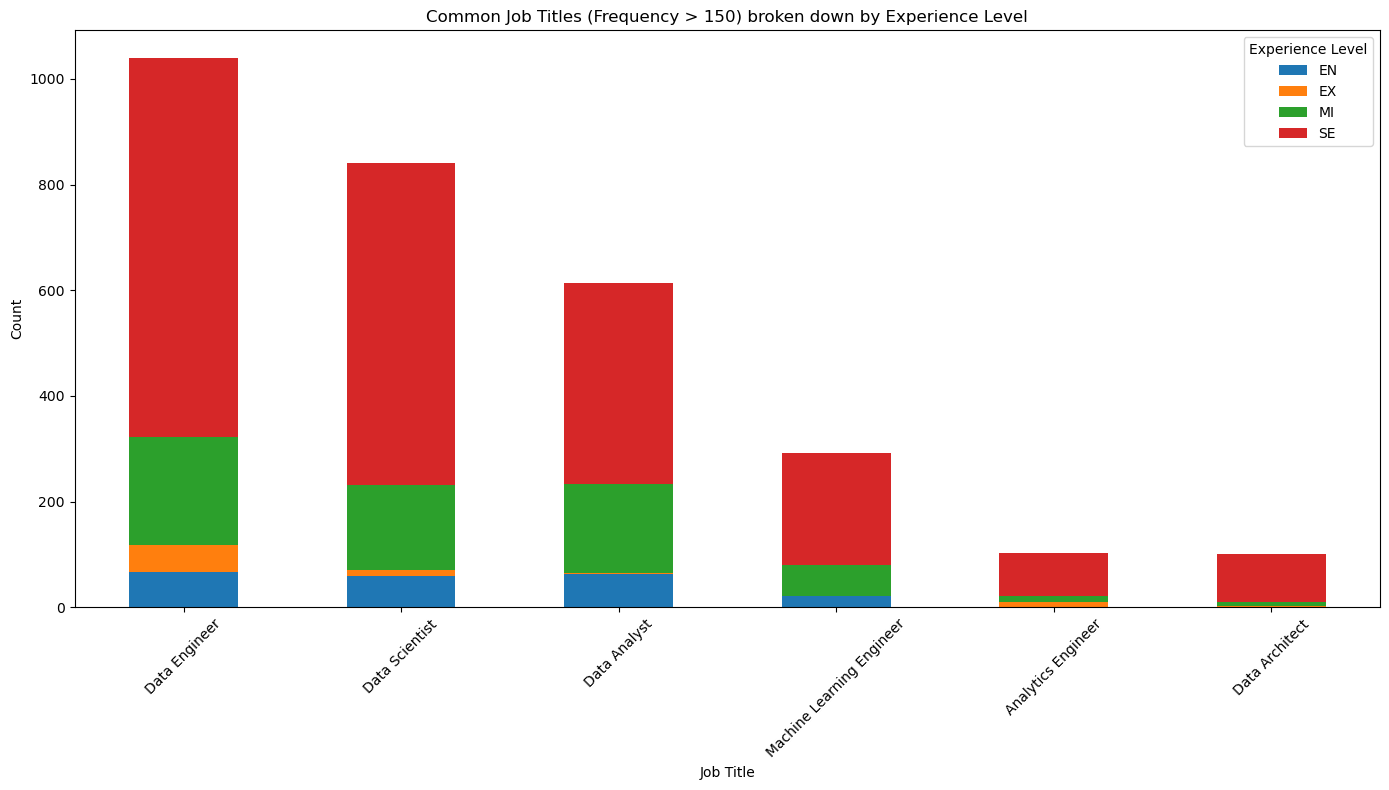

In [18]:
# Calculate frequency of each job_title
job_title_counts = df['job_title'].value_counts()

# Identify job titles with frequency > N
N = 150
common_titles = job_title_counts[job_title_counts > 100].index.tolist()

# Filter the DataFrame based on these job titles
filtered_df = df[df['job_title'].isin(common_titles)]

# Group by 'job_title' and 'experience_level' and then unstack
grouped = filtered_df.groupby(['job_title', 'experience_level']).size().unstack().fillna(0)

# Order the grouped dataframe by the total counts of each job_title
ordered_grouped = grouped.reindex(job_title_counts.index).dropna()

# Plotting the ordered grouped stacked bar chart
ax = ordered_grouped.plot(kind='bar', stacked=True, figsize=(14, 8))

# Adding labels and title
plt.title(f'Common Job Titles (Frequency > {N}) broken down by Experience Level')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.legend(title='Experience Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* We see that the three most job titles are: i) Data engineer, ii) Data scientist and iii) Data analyst
* The *Senior* experience level is the most required one, followed far by *Middle* experience level.

## Salary comparison

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


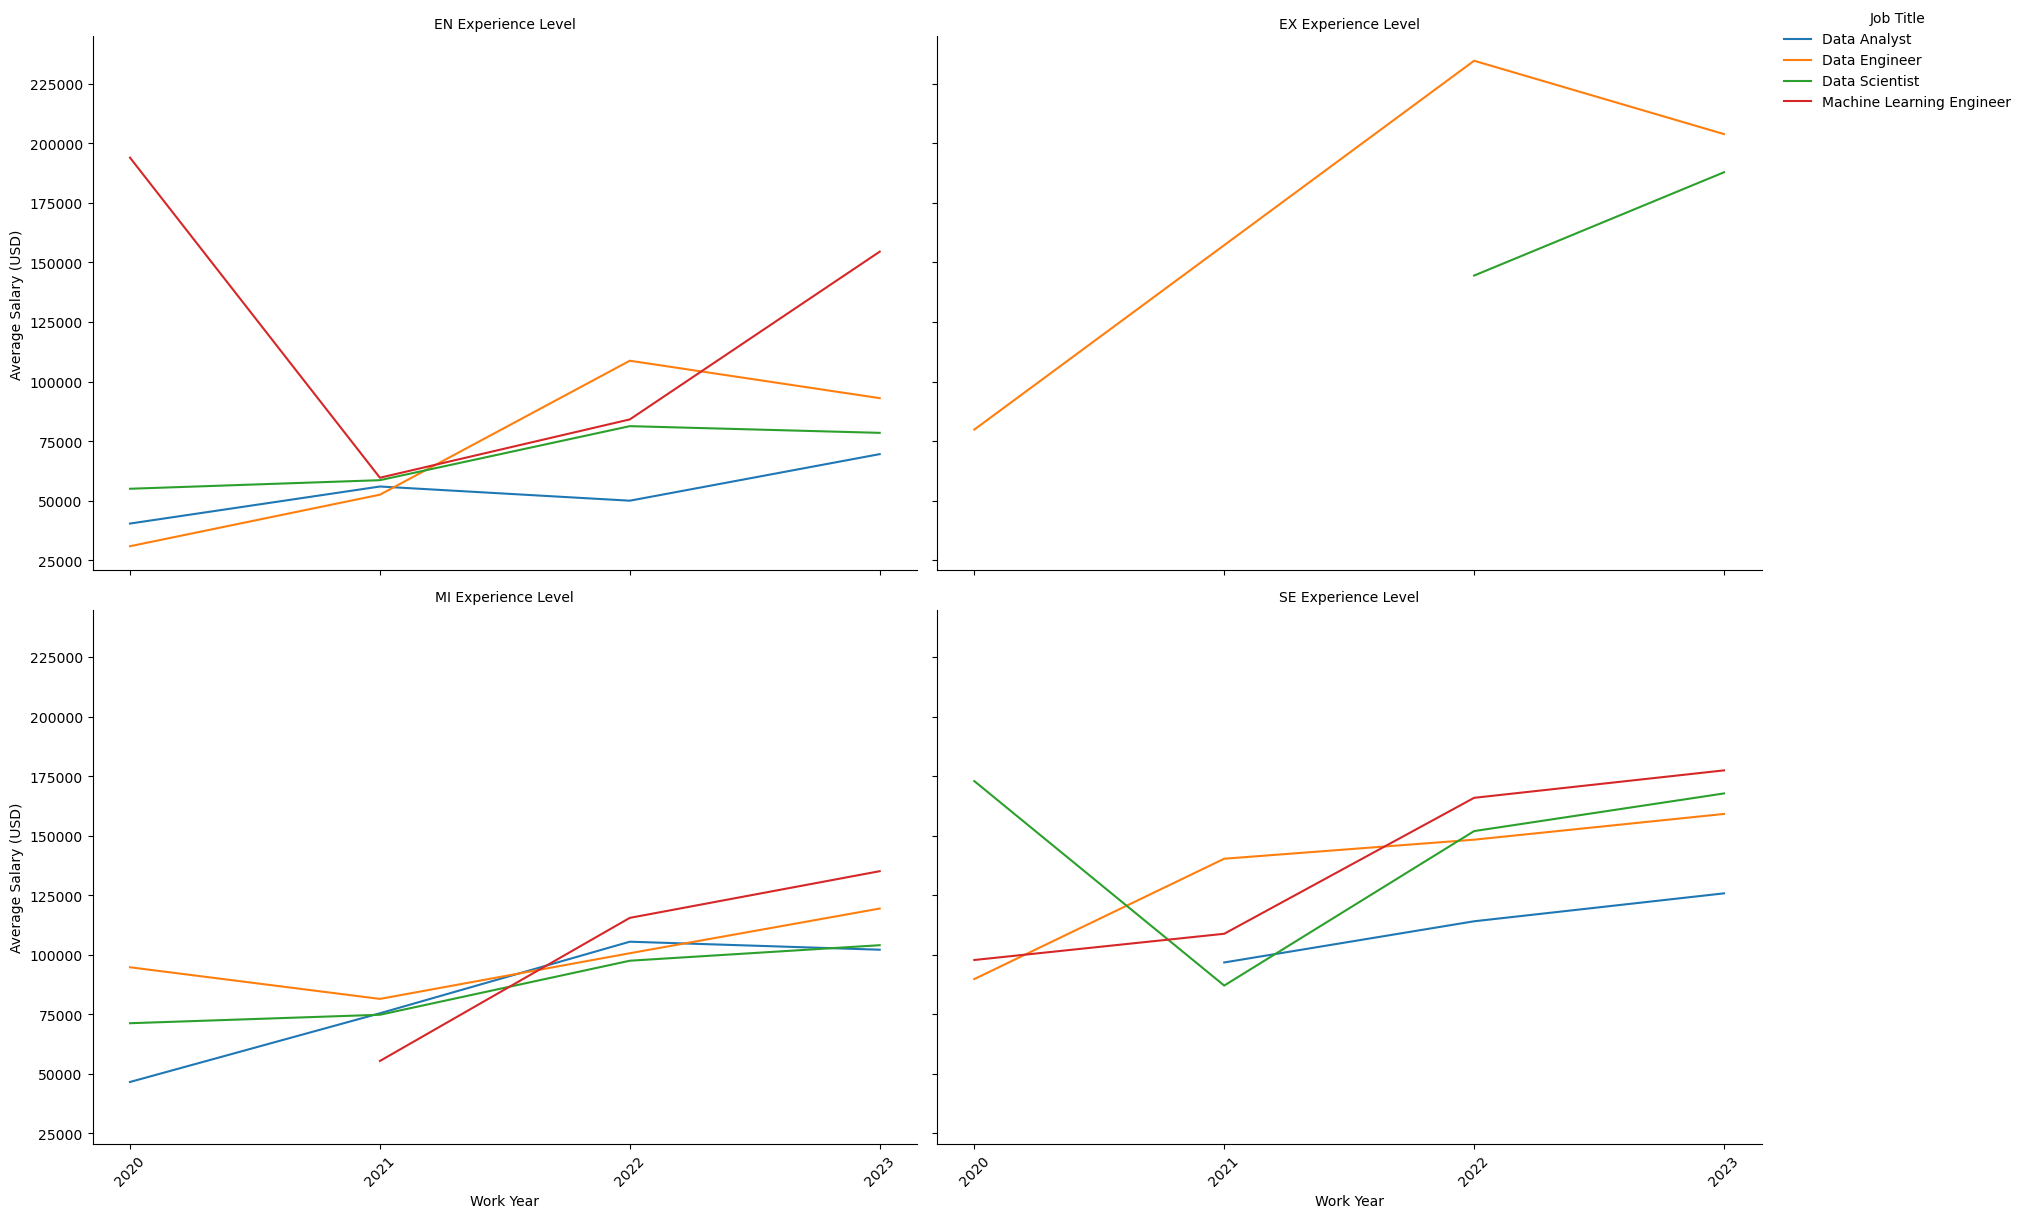

In [19]:
common_titles = ['Data Engineer', 'Data Scientist','Data Analyst','Machine Learning Engineer']
# Filter the DataFrame based on these job titles
filtered_df = df[df['job_title'].isin(common_titles)]

# Group by relevant columns and calculate mean salary
grouped = filtered_df.groupby(['job_title', 'experience_level', 'work_year'])['salary_in_usd'].mean().reset_index()

# Create a FacetGrid with separate plots for each experience_level
g = sns.FacetGrid(grouped, col='experience_level', col_wrap=2, height=6, aspect=1.5)
g = (g.map(sns.lineplot, 'work_year', 'salary_in_usd', 'job_title', estimator='mean', errorbar=None, palette='tab10')
     .set_axis_labels('Work Year', 'Average Salary (USD)')
     .set_titles("{col_name} Experience Level"))

# Adjust xticks and rotate labels for better readability
g.set(xticks=grouped['work_year'].unique())  # Show all unique work_years as xticks
g.set_xticklabels(grouped['work_year'].unique(), rotation=45)

# Adjust the legend position
g.add_legend(title='Job Title', loc='upper right')

# Display the plots
plt.show()

* We clearly see that salaries have been increasing over time for all the four most requested jobs faceted by experience le

# Profile report

In [21]:
from ydata_profiling import ProfileReport

In [22]:
profile = ProfileReport(df)

In [23]:
profile                     # or this one
profile.to_notebook_iframe() # use this line to show the output

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

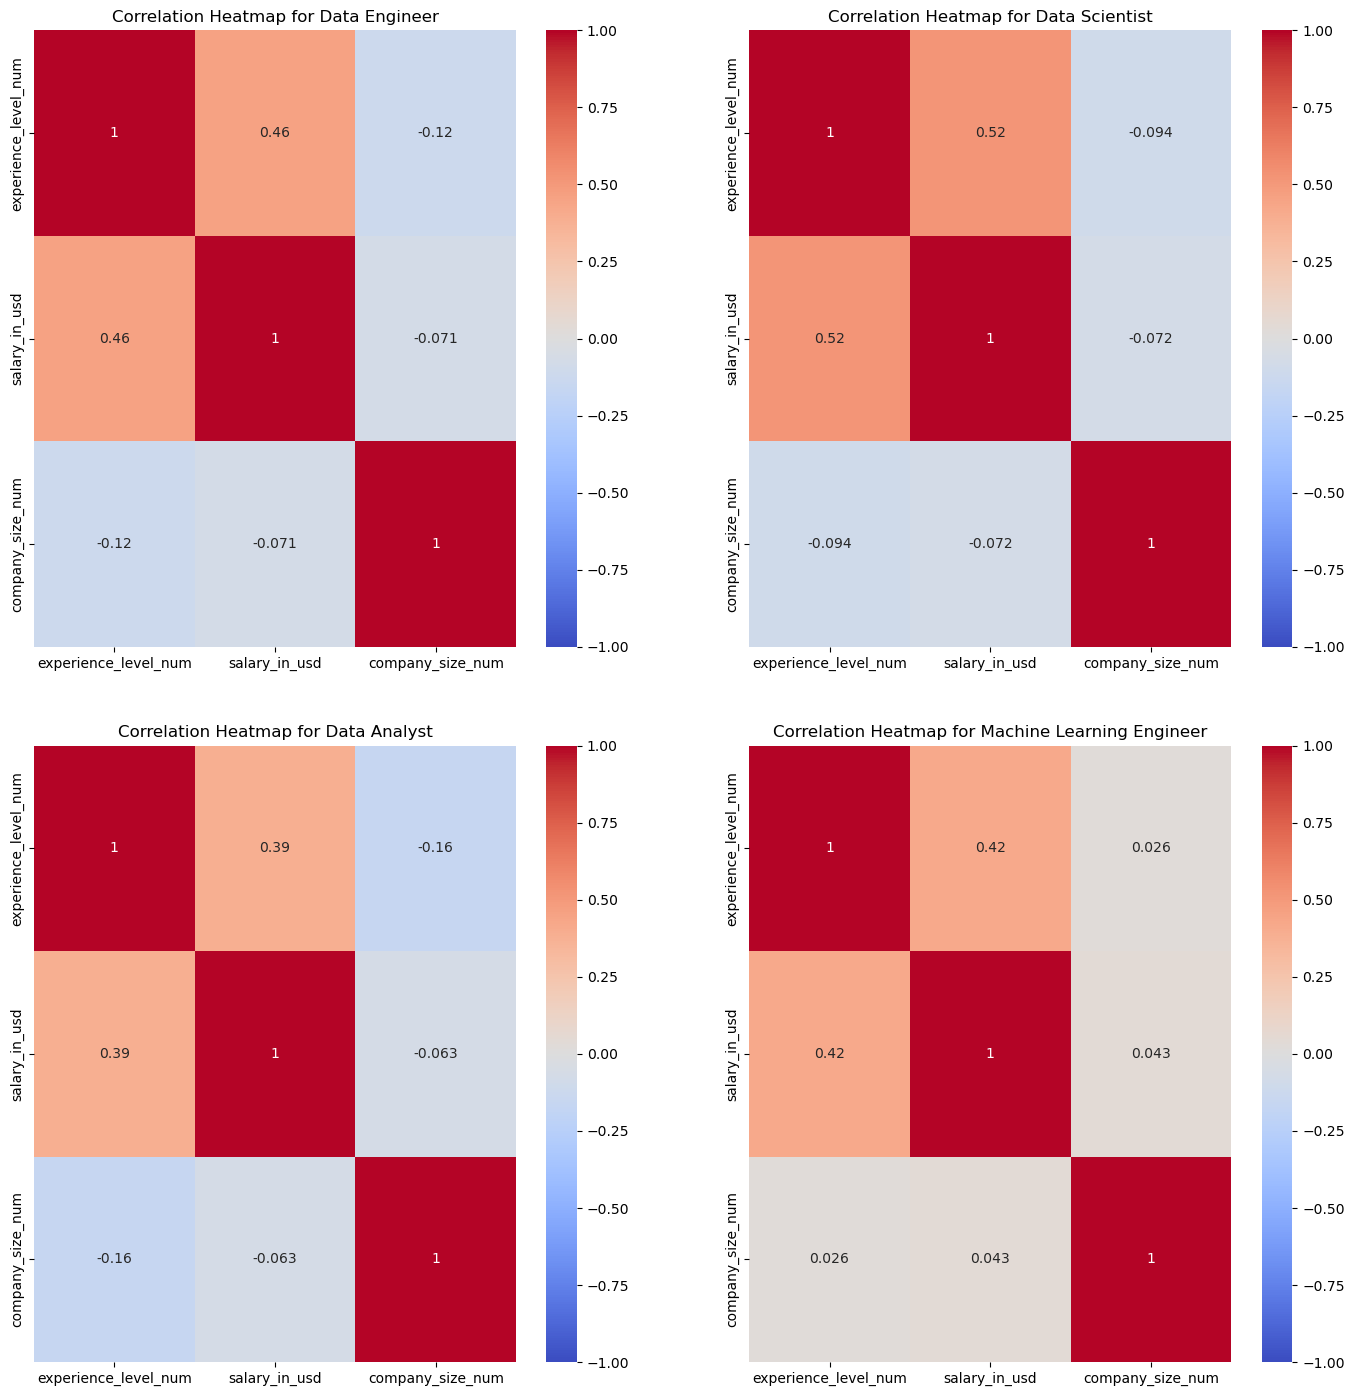

In [39]:
common_titles = ['Data Engineer', 'Data Scientist','Data Analyst','Machine Learning Engineer']

# Map categorical variables to numerical representations
experience_level_mapping = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
company_size_mapping = {'S': 0, 'M': 1, 'L': 2}

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.tight_layout(pad=5.0)  # Add padding between subplots for clarity

for ax, title in zip(axes.ravel(), common_titles):
    # Filter dataframe for the specific job title
    filtered_df = df[df['job_title'] == title].copy()
    
    # Convert the categorical variables to numerical representations using .loc
    filtered_df.loc[:, 'experience_level_num'] = filtered_df['experience_level'].map(experience_level_mapping)
    filtered_df.loc[:, 'company_size_num'] = filtered_df['company_size'].map(company_size_mapping)
    
    # Compute the correlation matrix for the specific columns
    correlation_matrix = filtered_df[['experience_level_num', 'salary_in_usd', 'company_size_num']].corr(method='spearman')

    # Plot the heatmap in the corresponding subplot
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
    ax.set_title(f"Correlation Heatmap for {title}")

plt.show()